<a href="https://colab.research.google.com/github/leman-cap13/DL_projects/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.keras.layers.Dense(10,activation='relu',kernel_initializer='he_normal')

<Dense name=dense, built=False>

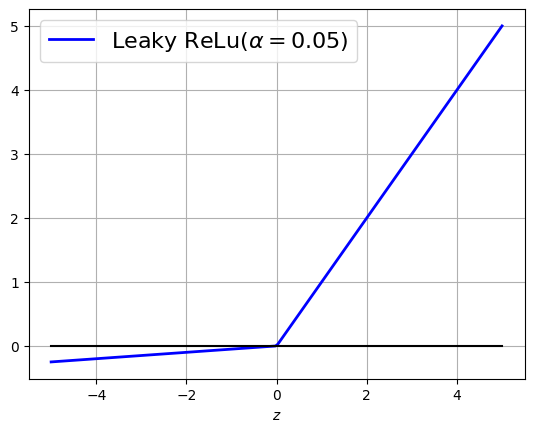

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def leaky_relu(z,alpha=0.01):
  return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.plot(z,leaky_relu(z,0.05),'b-',linewidth=2,
         label=r'Leaky ReLu($\alpha=0.05$)')

plt.plot([-5,5],[0,0],'k-')
plt.grid(True)
plt.xlabel("$z$")
plt.legend(loc='upper left',fontsize=16)
plt.show()

In [ ]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.05)


tf.keras.layers.Dense(10,activation=leaky_relu,kernel_initializer='he_normal')


<Dense name=dense_1, built=False>

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='leaky_relu',
                          kernel_initializer='he_normal')
])

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(negative_slope=0.2)

])

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full), (X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255.0,X_valid/255.0, X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer= 'he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100,activation='leaky_relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10,activation='softmax',
                          kernel_initializer='glorot_normal')


])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4271 - loss: 1.7879 - val_accuracy: 0.7196 - val_loss: 0.9297
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7292 - loss: 0.8834 - val_accuracy: 0.7666 - val_loss: 0.7251
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7693 - loss: 0.7162 - val_accuracy: 0.7916 - val_loss: 0.6408
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7882 - loss: 0.6488 - val_accuracy: 0.8066 - val_loss: 0.5910
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8040 - loss: 0.5966 - val_accuracy: 0.8118 - val_loss: 0.5590
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8144 - loss: 0.5681 - val_accuracy: 0.8180 - val_loss: 0.5366
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8184 - loss: 0.5445 - val_accuracy: 0.8230 - val_loss: 0.5162
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.5238 -

#ELU

In [ ]:
tf.keras.layers.Dense(10,activation='elu',kernel_initializer= 'he_normal')

<Dense name=dense_7, built=False>

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for i in range(100):
  model.add(tf.keras.layers.Dense(100,activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
class_names=['t-shirt','trousers','pullover','dress','coat','sandal','shift','snearker','bag','ankle boot']

In [ ]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

variance yayilma kok alti variance standart deviation

In [ ]:
model.fit(X_train_scaled,y_train,epochs=5,validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.3448 - loss: 1.7210 - val_accuracy: 0.6346 - val_loss: 0.9607
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6637 - loss: 0.8893 - val_accuracy: 0.7180 - val_loss: 0.7756
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7311 - loss: 0.7162 - val_accuracy: 0.7646 - val_loss: 0.6560
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7597 - loss: 0.6492 - val_accuracy: 0.7886 - val_loss: 0.5874
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7838 - loss: 0.5916 - val_accuracy: 0.8028 - val_loss: 0.5585


EXERCISE

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
for i in range(100):
  model.add(tf.keras.layers.Dense(100,activation='elu', kernel_initializer='he_normal'))

model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.2664 - loss: 2.0784 - val_accuracy: 0.3836 - val_loss: 1.5706
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.4764 - loss: 1.2761 - val_accuracy: 0.6546 - val_loss: 0.8775
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5769 - loss: 1.0418 - val_accuracy: 0.6084 - val_loss: 0.9319
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6101 - loss: 0.9657 - val_accuracy: 0.6766 - val_loss: 0.7896
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.6860 - loss: 0.7931 - val_accuracy: 0.7310 - val_loss: 0.7403


#Batch Normalization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='glorot_normal'),

])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7993 - loss: 0.5722 - val_accuracy: 0.8644 - val_loss: 0.3577
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.3621 - val_accuracy: 0.8698 - val_loss: 0.3398
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8861 - loss: 0.3078 - val_accuracy: 0.8658 - val_loss: 0.3370
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9016 - loss: 0.2680 - val_accuracy: 0.8708 - val_loss: 0.3450
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9135 - loss: 0.2341 - val_accuracy: 0.8766 - val_loss: 0.3527


In [ ]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

batchnormalization zamani adapt etmeye ehtiyyca qalmir

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(200,kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10,kernel_initializer='glorot_normal'),
    tf.keras.layers.Softmax(),

])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8033 - loss: 0.5509 - val_accuracy: 0.8540 - val_loss: 0.3830
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.3504 - val_accuracy: 0.8618 - val_loss: 0.3574
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8908 - loss: 0.2979 - val_accuracy: 0.8654 - val_loss: 0.3570
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9058 - loss: 0.2570 - val_accuracy: 0.8574 - val_loss: 0.4015
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9171 - loss: 0.2264 - val_accuracy: 0.8682 - val_loss: 0.4048


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(200,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax'),


])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8043 - loss: 0.5526 - val_accuracy: 0.8566 - val_loss: 0.3744
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8723 - loss: 0.3515 - val_accuracy: 0.8652 - val_loss: 0.3522


In [ ]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentrpy',
              optimizer=optimizer,
              metrics=['accuracy'])

clipvalue nisbeti qorumur 1den boyuk deyerleri kesir ve 1e beraber edir

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentrpy',
              optimizer=optimizer,
              metrics=['accuracy'])

clipnorm nisbeti qoruyur

In [ ]:
pos_class_id=class_names.index('pullover')
neg_class_id=class_names.index('t-shirt')

def split_dataset(X,y):
  y_for_B=(y==pos_class_id)| (y==neg_class_id)
  y_A=y[~y_for_B]
  y_B=(y[y_for_B]==pos_class_id).astype(np.float32)
  old_class_ids=list(set(range(10))-set([neg_class_id,pos_class_id]))
  for old_class_id, new_class_id in zip(old_class_ids,range(8)):
    y_A[y_A==old_class_id]=new_class_id
    return ((X[~y_for_B],y_A), (X[y_for_B], y_B))

(X_train_A,y_train_A), (X_train_B, y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A), (X_valid_B, y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A), (X_test_B, y_test_B)=split_dataset(X_test,y_test)
X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

In [ ]:
model_A=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax', kernel_initializer='glorot_normal'),

])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

model_A.fit(X_train_A,y_train_A,epochs=20,validation_data=(X_valid_A,y_valid_A))



Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1276 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1280 - loss: nan - val_accuracy: 0.1128 - val_loss: nan
Epoch 9

In [ ]:
model_A.save('my_model_A.keras')

In [ ]:
model_B=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,  activation='sigmoid', kernel_initializer='glorot_normal'),
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

model_B.save('my_model_B.keras')

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.5174 - loss: 0.7114 - val_accuracy: 0.5124 - val_loss: 0.6938
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5102 - loss: 0.6843 - val_accuracy: 0.5687 - val_loss: 0.6693
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5706 - loss: 0.6608 - val_accuracy: 0.6499 - val_loss: 0.6480
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6832 - loss: 0.6399 - val_accuracy: 0.7418 - val_loss: 0.6288
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7701 - loss: 0.6207 - val_accuracy: 0.7943 - val_loss: 0.6113
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8297 - loss: 0.6028 - val_accuracy: 0.8398 - val_loss: 0.5950
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8489 - loss: 0.5861 - val_accuracy: 0.8734 - val_loss: 0.5797
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8869 - loss: 0.5703 - val_accuracy: 0.8872 - val_loss: 0.5652

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9199 - loss: 0.4299


[0.42907699942588806, 0.9225000143051147]

In [ ]:
model_A=tf.keras.models.load_model('my_model_A.keras')
model_B_on_A=tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=False
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [ ]:
history=model_B_on_A.fit(X_train_B,y_train_B, epochs=4,validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan


In [ ]:
history.history

{'accuracy': [0.5550000071525574,
  0.5550000071525574,
  0.5550000071525574,
  0.5550000071525574],
 'loss': [nan, nan, nan, nan],
 'val_accuracy': [0.5153313279151917,
  0.5153313279151917,
  0.5153313279151917,
  0.5153313279151917],
 'val_loss': [nan, nan, nan, nan]}

In [ ]:
for layer in model_B_on_A.layers[:-1]:
   layer.trainable=True

optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

model_B_on_A.fit(X_train_B, y_train_B, epochs=16,validation_data=(X_valid_B,y_valid_B))


Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5153 - val_loss: nan
Epoch 9/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

momentum suretli  sekinde minimum noqteye gedir weigthi g average istifade olunur gradient sgd 0 olsa bile momentum da ortalama nezere alindigina gore davam edecek minimum noqteye dogru momentum global noqtede ilk novbede tapmir kecir gedir sonra qayidir
nesterov=True NAG - improved momentum

rmsprop her bir toreme ferqli learning rate e vurulur

learning rate decay-

In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Input(shape=[28,28]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
  model=build_model()
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))


#Momentum Optimizers

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

#NAG Nesterov Accelerated Gradient

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# ADA gradient

learning rate decay yasadigina gore cox istifade olunmur

In [ ]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
history_adagrand=build_and_train_model(optimizer)

#RMSprop

In [ ]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
history_rmsprop=build_and_train_model(optimizer)

#Adam optimization

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [ ]:
history_adam=build_and_train_model(optimizer)

#Adamax Optimizer

adamax ada ile eynidi sadece modul da yazilir formula

In [ ]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
history_adam=build_and_train_model(optimizer)

#Nadam optimizer

In [ ]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#AdamW Optimization adam weight decay

In [ ]:
history_adam=build_and_train_model(optimizer)

overfit olarsa isletmek olar L2 Ile eyni menaya gelir adama a birbasa regularization elave etmek olmur ama AdamW yazmaq decay istifade etmek eyni menya gelir

In [ ]:
optimizer=tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
history_adam=build_and_train_model(optimizer)

#Learning rate Scheduling

In [ ]:
lr_schedule=tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

#Exponential scheduleing

In [ ]:
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_exponential_scheduling=build_and_train_model(optimizer)

#Piecewise constant Scheduling

In [ ]:
lr_schedule=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000,80_000],
    values=[0.01,0.005,0.001]
)

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_piece_decay=build_and_train_model(optimizer)

#Avoiding Overfitting Through Regularizatin

In [ ]:
layer=tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal',
                            kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
from functools import partial
RegularizedDense=partial(
    tf.keras.layers.Dense,
    activation='relu',
    kernel_initializer='he_normal',
    kernel_regularizer=tf.keras.regularizers.l1(0.01)

)

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(200),
    RegularizedDense(10, activation='softmax', kernel_initializer='glorot_normal')

])



In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=2, validation_data=(X_valid,y_valid))

#Dropout

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist
X_train, y_train=X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255.0, X_valid/255.0,X_test/255.0

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'),

])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5712 - loss: 1.2217 - val_accuracy: 0.8052 - val_loss: 0.5606
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7640 - loss: 0.6585 - val_accuracy: 0.8298 - val_loss: 0.4873


In [ ]:
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8299 - loss: 0.4929


[0.4960707426071167, 0.8286908864974976]

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.5097


[0.5178588628768921, 0.8184000253677368]

#MC Monte Carlo Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas=np.stack([model(X_test, training=True) for _ in range(100) ])

In [ ]:
y_probas.shape

(100, 10000, 10)

In [ ]:
y_proba=y_probas.mean(axis=0)

In [ ]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.008, 0.   , 0.007, 0.   ,
        0.985]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.005, 0.   ,
       0.986], dtype=float32)

In [ ]:
y_std=y_probas.std(axis=0)
y_std[0].round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred=np.argmax(y_proba, axis=1)
accuracy=np.sum(y_pred==y_test)/len(y_test)
accuracy

0.8635

In [ ]:
class MCDropout(tf.keras.layers.Dropout):
  def call(self,inputs,training=True):
    return super().call(inputs,training=True)
Dropout=tf.keras.layers.Dropout
mc_model =tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer,Dropout) else layer
    for layer in model.layers

])
mc_model.set_weights(model.get_weights())
mc_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout (MCDropout)               │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_1 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_2 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#Max Norm

In [ ]:
dense=tf.keras.layers.Dense(100,activation='relu', kernel_initializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.))



In [ ]:
MaxNormDense=partial(tf.keras.layers.Dense,
                     activation='relu',kernel_initializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation='softmax', kernel_initializer='glorot_normal')
])

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7388 - loss: 0.7304 - val_accuracy: 0.8258 - val_loss: 0.4514
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8464 - loss: 0.4256 - val_accuracy: 0.8362 - val_loss: 0.4237
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8580 - loss: 0.3893 - val_accuracy: 0.8340 - val_loss: 0.4304
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8653 - loss: 0.3651 - val_accuracy: 0.8412 - val_loss: 0.4171
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.3542 - val_accuracy: 0.8500 - val_loss: 0.3980
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8717 - loss: 0.3424 - val_accuracy: 0.8350 - val_loss: 0.4178
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8755 - loss: 0.3349 - val_accuracy: 0.8416 - val_loss: 0.4009
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8765 - loss: 0.3310 - 